# EURUSD price prediction

## Import Libraries

In [30]:
import pandas as pd                  # dataframe library
import matplotlib.pyplot as plt      # plot data
import numpy as np                   # N-dim object support

# do ploting inline
%matplotlib inline

## Load and review data

In [31]:
df = pd.read_csv(".\EU_1H_1.1.16_1.2.17.csv")     # load data

In [32]:
df.shape

(6362, 13)

In [33]:
df.head(3)

,OpenTime,DayHour,DayWeek,Bar1OC,Bar1HL,Bar1Shape,Oscilator,ShortTrend,LongTrend,Volatility,SupportUp,SupportDown,Profit
0,2016.01.26 12:00:00,13,2,1.1,12.0,3.55,8.90188,-41.75933,2.73622,0.00142,40.1,3.5,True
1,2016.01.26 13:00:00,14,2,0.9,17.3,7.90,13.85928,-41.41867,2.54689,0.00147,32.0,6.3,True
2,2016.01.26 14:00:00,15,2,10.1,18.1,-0.10,29.01745,-40.70200,2.40756,0.00150,2.1,3.4,True


In [34]:
df.tail(3)

,OpenTime,DayHour,DayWeek,Bar1OC,Bar1HL,Bar1Shape,Oscilator,ShortTrend,LongTrend,Volatility,SupportUp,SupportDown,Profit
6359,2017.01.31 12:00:00,13,2,-1.9,17.6,6.85,76.89352,-18.99000,71.41289,0.00172,-40.2,63.0,True
6360,2017.01.31 13:00:00,14,2,7.0,20.3,0.85,86.99074,-17.84400,70.85844,0.00176,2.3,58.0,True
6361,2017.01.31 15:00:00,16,2,17.9,30.9,-5.80,95.05162,-14.25733,70.45022,0.00216,-85.4,94.9,False


In [35]:
df.isnull().values.any()

False

## Check for correlations

In [36]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax =plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

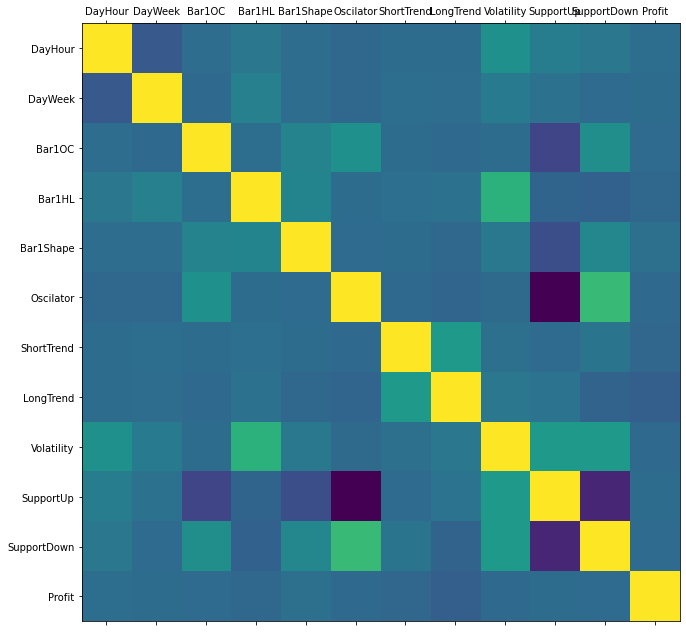

In [37]:
plot_corr(df)

In [38]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

## Delete unecesary columns

In [39]:
del df['OpenTime']
del df['DayWeek']
del df['Bar1Shape']

In [40]:
df.head(3)

,DayHour,Bar1OC,Bar1HL,Oscilator,ShortTrend,LongTrend,Volatility,SupportUp,SupportDown,Profit
0,13,1.1,12.0,8.90188,-41.75933,2.73622,0.00142,40.1,3.5,True
1,14,0.9,17.3,13.85928,-41.41867,2.54689,0.00147,32.0,6.3,True
2,15,10.1,18.1,29.01745,-40.70200,2.40756,0.00150,2.1,3.4,True


## Check data Types

Change False to 0 and True to 1 

In [41]:
profit_map = {False : 0, True : 1}

In [42]:
df['Profit'] = df['Profit'].map(profit_map)

In [43]:
df.head(3)

,DayHour,Bar1OC,Bar1HL,Oscilator,ShortTrend,LongTrend,Volatility,SupportUp,SupportDown,Profit
0,13,1.1,12.0,8.90188,-41.75933,2.73622,0.00142,40.1,3.5,1
1,14,0.9,17.3,13.85928,-41.41867,2.54689,0.00147,32.0,6.3,1
2,15,10.1,18.1,29.01745,-40.70200,2.40756,0.00150,2.1,3.4,1


TBD: Change profit from 1.0 and 0.0 to 1 and 0

## Check true/false ratio

In [44]:
num_true = len(df.loc[df['Profit'] == 1])
num_false = len(df.loc[df['Profit'] == 0])
print("Num true: {0} ({1:2.2f})".format(num_true, (num_true/(num_true + num_false)) * 100))
print("Num false: {0} ({1:2.2f})".format(num_true, (num_false/(num_true + num_false)) * 100))

Num true: 3413 (53.65)
Num false: 3413 (46.35)


## Split Data

Split 70% for training, 30% for testing

In [45]:
from sklearn.model_selection import train_test_split
feature_col_names = ['DayHour','Bar1OC','Bar1HL','Oscilator','ShortTrend','LongTrend','Volatility','SupportUp','SupportDown']
predicted_class_names = ['Profit']

x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=split_test_size,random_state=42)

Check split 70% train and 30% test

In [46]:
print("({0:0.2f}) - {1}".format((len(X_train)/len(df.index)) * 100, len(X_train)))
print("({0:0.2f}) - {1}".format((len(X_test)/len(df.index)) * 100, len(X_test)))

(69.99) - 4453
(30.01) - 1909


Verify predicted values were split correctly

In [47]:
print("Training true: {0:0.2f}%".format(len(Y_train[Y_train[:] == 1])/len(Y_train) * 100))
print("Training false: {0:0.2f}%".format(len(Y_train[Y_train[:] == 0])/len(Y_train) * 100))

Training true: 53.54%
Training false: 46.46%


In [48]:
print("Test true: {0:0.2f}% - {1}".format(len(Y_test[Y_test[:] == 1])/len(Y_test) * 100,len(Y_test[Y_test[:] == 1])))
print("Test false: {0:0.2f}% - {1}".format(len(Y_test[Y_test[:] == 0])/len(Y_test) * 100,len(Y_test[Y_test[:] == 0])))

Test true: 53.90% - 1029
Test false: 46.10% - 880


## Train Algorithm - NaiveBayes

In [49]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,Y_train.ravel())

GaussianNB()

### Performance on Training data

In [50]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train,nb_predict_train)))

Accuracy: 0.5401


### Performance on Testing data 

In [51]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test,nb_predict_test)))

Accuracy: 0.5443


#### Metrics

In [52]:
print("confusion Metrix")
print("TP  FP")
print("TN  FN")
print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test, labels=[1,0])))

print("\nClasification report")
print(metrics.classification_report(Y_test,nb_predict_test,labels=[1,0]))


confusion Metrix
TP  FP
TN  FN
[[794 235]
 [635 245]]

Clasification report
              precision    recall  f1-score   support

           1       0.56      0.77      0.65      1029
           0       0.51      0.28      0.36       880

    accuracy                           0.54      1909
   macro avg       0.53      0.53      0.50      1909
weighted avg       0.53      0.54      0.51      1909



recall - how well predits the model if people have diabetes (in our case wining trades) = TP/(TP + FN)

precision = TP/(TP + FP)


## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,n_estimators=100)
rf_model.fit(X_train,Y_train.ravel())

RandomForestClassifier(random_state=42)

### Predict training data

In [54]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0}".format(metrics.accuracy_score(Y_train,rf_predict_train)))

Accuracy: 1.0


### Predict test data

In [55]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(Y_test,rf_predict_test)))

Accuracy: 0.7370350969093766


In [56]:
print("confusion Metrix")
print("TP  FP")
print("TN  FN")
print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels=[1,0])))


print("\nClasification report")
print(metrics.classification_report(Y_test,rf_predict_test,labels=[1,0]))

confusion Metrix
TP  FP
TN  FN
[[826 203]
 [299 581]]

Clasification report
              precision    recall  f1-score   support

           1       0.73      0.80      0.77      1029
           0       0.74      0.66      0.70       880

    accuracy                           0.74      1909
   macro avg       0.74      0.73      0.73      1909
weighted avg       0.74      0.74      0.74      1909



In [57]:
num_true = len(rf_predict_test)

### Get most important inputs

Feature ranking:
1. LongTrend (index = 5) (0.165552)
2. ShortTrend (index = 4) (0.155711)
3. SupportDown (index = 8) (0.107214)
4. Volatility (index = 6) (0.106882)
5. SupportUp (index = 7) (0.106731)
6. Oscilator (index = 3) (0.102675)
7. Bar1HL (index = 2) (0.096446)
8. Bar1OC (index = 1) (0.090919)
9. DayHour (index = 0) (0.067869)


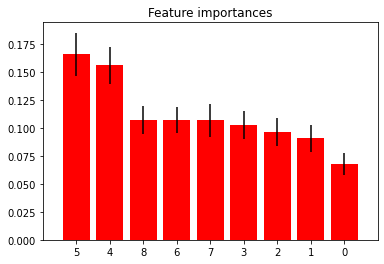

In [63]:
importances = rf_model.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (index = %d) (%f)" % (f + 1, feature_col_names[indices[f]],indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train,Y_train.ravel())

lr_predict_test = lr_model.predict(X_test)

print("confusion Metrix")
print("TP  FP")
print("TN  FN")
print("{0}".format(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1,0])))


print("\nClasification report")
print(metrics.classification_report(Y_test,lr_predict_test,labels=[1,0]))


confusion Metrix
TP  FP
TN  FN
[[857 172]
 [672 208]]

Clasification report
             precision    recall  f1-score   support

          1       0.56      0.83      0.67      1029
          0       0.55      0.24      0.33       880

avg / total       0.55      0.56      0.51      1909



Setting regularization parameter

lst max value of 0.834 occured at C=0.400


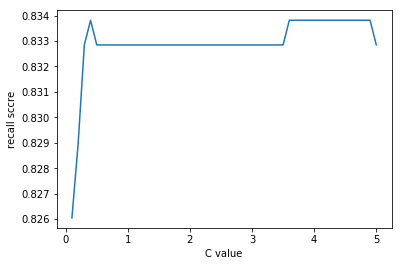

In [31]:
C_start = 0.1
C_end  = 5
C_inc = 0.1 

C_values, recall_scores = [], []

C_val = C_start 
best_recall_score = 0 
while (C_val < C_end): 
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42) 
    lr_model_loop.fit(X_train, Y_train.ravel()) 
    lr_predict_loop_test = lr_model_loop.predict(X_test) 
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test) 
    recall_scores.append(recall_score) 
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test 
    C_val = C_val + C_inc 
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("lst max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
%matplotlib inline 
plt.plot(C_values, recall_scores, "-") 
plt.xlabel("C value") 
plt.ylabel("recall sccre") 


### Logistic Regresion with class_weight="balanced"  - Worse if class is balanced

lst max value of 0.506 occured at C=0.600


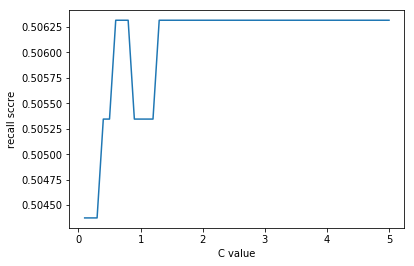

In [32]:
C_start = 0.1
C_end  = 5
C_inc = 0.1 

C_values, recall_scores = [], []

C_val = C_start 
best_recall_score = 0 
while (C_val < C_end): 
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced" ,random_state=42) 
    lr_model_loop.fit(X_train, Y_train.ravel()) 
    lr_predict_loop_test = lr_model_loop.predict(X_test) 
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test) 
    recall_scores.append(recall_score) 
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test 
    C_val = C_val + C_inc 
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("lst max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
%matplotlib inline 
plt.plot(C_values, recall_scores, "-") 
plt.xlabel("C value") 
plt.ylabel("recall sccre") 


## LogisticRegressionCV

In [33]:
from sklearn.linear_model import LogisticRegressionCV 
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True) 
lr_cv_model.fit(X_train, Y_train.ravel()) 

LogisticRegressionCV(Cs=3, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Predict on Test Data

In [34]:
lr_cv_predict_test = lr_cv_model.predict(X_test) 
print("Accuracy: {0:.4f})".format(metrics.accuracy_score(Y_test, lr_cv_predict_test))) 
print("TP  FP")
print("TN  FN")
print(metrics.confusion_matrix(Y_test, lr_cv_predict_test, labels=[1, 0]) ) 
print("") 
print("Classification Report") 
print(metrics.classification_report(Y_test, lr_cv_predict_test, labels=[1,0])) 


Accuracy: 0.5574)
TP  FP
TN  FN
[[861 168]
 [677 203]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.84      0.67      1029
          0       0.55      0.23      0.32       880

avg / total       0.55      0.56      0.51      1909



### Save model

In [35]:
from sklearn.externals import joblib

filename = 'LogisticRegressionCV_EURUSD.sav'
joblib.dump(lr_cv_model, filename)

# load the model
#loaded_model = joblib.load(filename)

['LogisticRegressionCV_EURUSD.sav']

### Prediction on all data

In [36]:
lr_cv_predict_all = lr_cv_model.predict(x) 
print("Accuracy: {0:.4f})".format(metrics.accuracy_score(y, lr_cv_predict_all))) 
print("TP  FP")
print("TN  FN")
print(metrics.confusion_matrix(y, lr_cv_predict_all, labels=[1, 0]) ) 
print("") 
print("Classification Report") 
print(metrics.classification_report(y, lr_cv_predict_all, labels=[1,0])) 

Accuracy: 0.5564)
TP  FP
TN  FN
[[2815  598]
 [2224  725]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.82      0.67      3413
          0       0.55      0.25      0.34      2949

avg / total       0.55      0.56      0.51      6362



## Prediction on second test data

In [37]:
df2 = pd.read_csv(".\EU_1H_1.1.17_22.4.17.csv")
df2.shape

(1367, 13)

In [38]:
df2.isnull().values.any()

False

In [39]:
del df2['OpenTime']
del df2['DayWeek']
del df2['Bar1Shape']

df2['Profit'] = df2['Profit'].map(profit_map)

In [40]:
df2.shape

(1367, 10)

In [41]:
df2.head(3)

,DayHour,Bar1OC,Bar1HL,Oscilator,ShortTrend,LongTrend,Volatility,SupportUp,SupportDown,Profit
0,13,-1.2,8.3,42.32614,48.16000,95.57978,0.00133,23.0,14.1,1
1,14,5.5,16.5,65.09217,49.44400,95.72178,0.00139,13.8,15.1,0
2,15,13.9,23.2,74.47657,50.93333,96.12444,0.00145,4.3,17.9,0


In [42]:
num_true2 = len(df2.loc[df2['Profit'] == 1])
num_false2 = len(df2.loc[df2['Profit'] == 0])
print("Num true: {0} ({1:2.2f})".format(num_true2, (num_true2/(num_true2 + num_false2)) * 100))
print("Num false: {0} ({1:2.2f})".format(num_false2, (num_false2/(num_true2 + num_false2)) * 100))

Num true: 578 (42.28)
Num false: 789 (57.72)


In [43]:
feature_col_names2 = ['DayHour','Bar1OC','Bar1HL','Oscilator','ShortTrend','LongTrend','Volatility','SupportUp','SupportDown']
predicted_class_names2 = ['Profit']

x2 = df2[feature_col_names2].values
y2 = df2[predicted_class_names2].values

In [44]:
rf_predict_train2 = rf_model.predict(x2)
print("TP  FP")
print("TN  FN")
print("Accuracy: {0}".format(metrics.accuracy_score(y2,rf_predict_train2)))
cf2 = metrics.confusion_matrix(y2, rf_predict_train2, labels=[1,0])
print("{0}".format(cf2))
# explained
print("true negatives : {0}".format(cf2[0,0]))
print("false negatives: {0}".format(cf2[1,0]))
print("true positives : {0}".format(cf2[1,1]))
print("false positives: {0}".format(cf2[0,1]))
print("Predict Num true: {0}".format(len(rf_predict_train2[rf_predict_train2[:] == 1])))
print("Predict Num false: {0}".format(len(rf_predict_train2[rf_predict_train2[:] == 0])))

tp = 0
tn = 0
fp = 0
fn = 0


for idx in range(0,len(rf_predict_train2)):
    if(rf_predict_train2[idx] == 1 and y2[idx] == 1):
        tp = tp + 1
    if(rf_predict_train2[idx] == 1 and y2[idx] == 0):
        tn = tn + 1
    if(rf_predict_train2[idx] == 0 and y2[idx] == 1):
        fp = fp + 1
    if(rf_predict_train2[idx] == 0 and y2[idx] == 0):
        fn = fn + 1
print("TP = {}".format(tp))
print("TN = {}".format(tn))
print("FP = {}".format(fp))
print("FN = {}".format(fn))





TP  FP
TN  FN
Accuracy: 0.5259692757863935
[[364 214]
 [434 355]]
true negatives : 364
false negatives: 434
true positives : 355
false positives: 214
Predict Num true: 798
Predict Num false: 569
TP = 364
TN = 434
FP = 214
FN = 355


In [45]:
count = 0
for index in range(len(rf_predict_train2)):
    if (rf_predict_train2[index] == 0 and y2[index] == 1):
        count += 1
print("Count:{0}".format(count))

Count:214


In [46]:
lr_cv_predict_test2 = lr_cv_model.predict(x2) 
print("TP  FP")
print("TN  FN")
print("Accuracy: {0}".format(metrics.accuracy_score(y2,lr_cv_predict_test2)))
print("{0}".format(metrics.confusion_matrix(y2, lr_cv_predict_test2, labels=[1,0])))
print("Num true: {0}".format(len(lr_cv_predict_test2[lr_cv_predict_test2[:] == 1])))
print("Num false: {0}".format(len(lr_cv_predict_test2[lr_cv_predict_test2[:] == 0])))

print("Classification Report") 
print(metrics.classification_report(y2, lr_cv_predict_test2, labels=[1,0])) 

TP  FP
TN  FN
Accuracy: 0.4725676664228237
[[462 116]
 [605 184]]
Num true: 1067
Num false: 300
Classification Report
             precision    recall  f1-score   support

          1       0.43      0.80      0.56       578
          0       0.61      0.23      0.34       789

avg / total       0.54      0.47      0.43      1367

